In [76]:
import pandas as pd

# Nahrání CSV
df = pd.read_csv('zdrojova_data_sreality.csv')

# Zobrazení prvních 5
# print(df.head().to_markdown(index=False, numalign="left", stralign="left"))


In [77]:
# Rozdělení sloupce `Lokace` na `Ulice` a `Město`
df[['Ulice', 'Město']] = df['Lokace'].str.split(', ', expand=True)

# Odstranění sloupce `Lokace`
df = df.drop(columns=['Lokace'])

In [78]:
# Odstranění nečíselných znaků ze sloupce `Cena`, kromě desetinné čárky '.'
df['Cena'] = df['Cena'].astype(str).str.replace('[^0-9.]', '', regex=True)

# Převod sloupce `Cena` na číselný formát
df['Cena'] = pd.to_numeric(df['Cena'])

# Zobrazení prvních 5 řádků
# print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

In [79]:
# Přejmenování sloupců
df = df.rename(columns={'Cena': 'Cena (Kč)', 'Rozměry bytu': 'Rozměry bytu (m2)'})


# Zobrazení prvních 5 řádků
# print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

In [80]:
# Filtrování dat, kde `Město` je pouze "Zlín"
df = df[df['Město'] == 'Zlín']

In [81]:
# Vypočítám průměrnou cenu pro kompozici bytu 1+kk
average_cena_1kk = df[df['Kompozice bytu'] == '1+kk']['Cena (Kč)'].mean()

# Nahradím nan hodnoty v `Cena (Kč)` průměrnou cenou pro položky'1+kk'
df.loc[(df['Kompozice bytu'] == '1+kk') & (df['Cena (Kč)'].isnull()), 'Cena (Kč)'] = average_cena_1kk

# print(df.head(160).to_markdown(index=False, numalign="left", stralign="left"))


In [82]:
#  Ve sloupci "Kompozice bytu" jsou nějaké nerelevantní hodnoty - neukazují kompozici bytu - a kompozice bytu (1+kk) je uvedena v "Rozměry bytu"
# print(df['Kompozice bytu'].unique())
# print(df['Rozměry bytu (m2)'].unique())

In [83]:
# Prohození hodnot v `Kompozice bytu` a `Rozměry bytu (m2)` pro řádky, kde `Kompozice bytu` obsahuje hodnotu 'bytu'
df.loc[df['Kompozice bytu'] == 'bytu', ['Kompozice bytu', 'Rozměry bytu (m2)']] = df.loc[df['Kompozice bytu'] == 'bytu', ['Rozměry bytu (m2)', 'Kompozice bytu']].values

# print(df.head(160).to_markdown(index=False, numalign="left", stralign="left"))


In [84]:
# Nahrazení 'bytu' průměrnou hodnotou `Rozměry bytu (m2)` pro `Kompozice bytu` '1+kk'
df['Rozměry bytu (m2)'] = df['Rozměry bytu (m2)'].replace('bytu', df[(df['Kompozice bytu'] == '1+kk') & (df['Rozměry bytu (m2)']!= 'bytu')]['Rozměry bytu (m2)'].astype(int).mean())

# print(df.head(160).to_markdown(index=False, numalign="left", stralign="left"))

# print(df.info())


In [85]:
# Bude potřeba přetypovat ´Rozměry bytu´ a´Cena bytu´ na integer, abych s nimi mohl dále pracovat
df['Rozměry bytu (m2)'] = df['Rozměry bytu (m2)'].astype('int64')
df['Cena (Kč)'] = df['Cena (Kč)'].astype('int64')

# print(df.info())

Průměrná Cena (Kč): 14480.84

Průměrná Cena (Kč) podle Kompozice bytu:
| Kompozice bytu   | Cena (Kč)   |
|:-----------------|:------------|
| 1+1              | 10145.5     |
| 1+kk             | 11414.1     |
| 2+1              | 13465.4     |
| 2+kk             | 16838.5     |
| 3+1              | 16670.8     |
| 3+kk             | 21000       |
| 4+1              | 20000       |
| pokoje           | 3854        |

Průměrné Rozměry bytu (m2) podle Kompozice bytu:
| Kompozice bytu   | Rozměry bytu (m2)   |
|:-----------------|:--------------------|
| 1+1              | 33.4545             |
| 1+kk             | 29.1875             |
| 2+1              | 56.7692             |
| 2+kk             | 57.8462             |
| 3+1              | 73.5                |
| 3+kk             | 85                  |
| 4+1              | 81                  |
| pokoje           | 101.5               |

Top 5 Ulic s nejvyšší průměrnou Cenou (Kč):
| Ulice           | Cena (Kč)   |
|:----------------|:

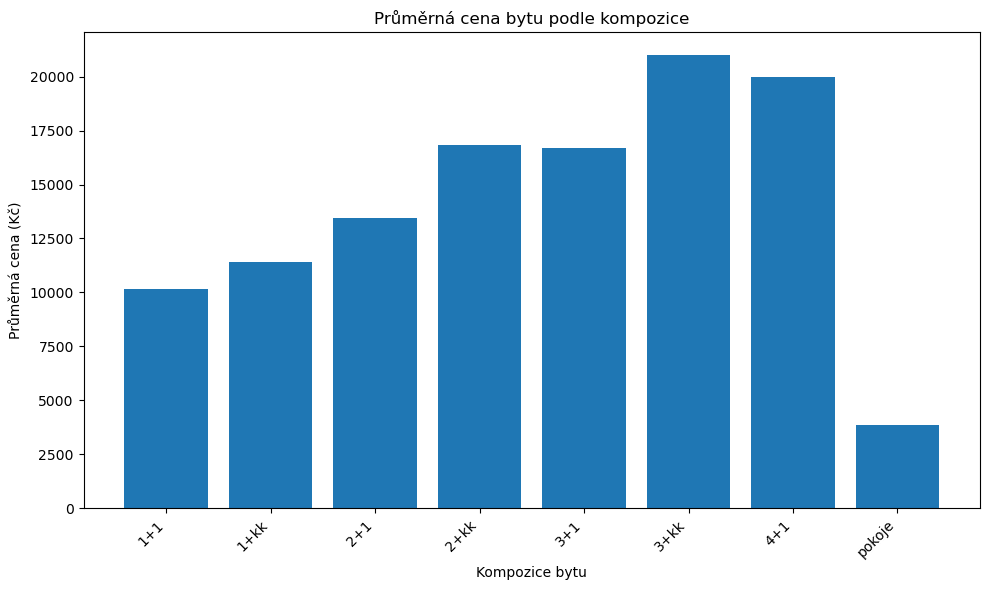

In [86]:
# Vypočítá a vypíše průměrnou `Cena (Kč)`
prumer_cena = df['Cena (Kč)'].mean()
print(f"Průměrná Cena (Kč): {prumer_cena:.2f}")

# Seskupí podle `Kompozice bytu` a vypočítá průměrnou `Cena (Kč)`
prumer_cena_kompozice = df.groupby('Kompozice bytu')['Cena (Kč)'].mean()
print("\nPrůměrná Cena (Kč) podle Kompozice bytu:")
print(prumer_cena_kompozice.to_markdown(numalign="left", stralign="left"))

# Seskupí podle `Kompozice bytu` a vypočítá průměrné `Rozměry bytu (m2)`
prumer_rozmery_kompozice = df.groupby('Kompozice bytu')['Rozměry bytu (m2)'].mean()
print("\nPrůměrné Rozměry bytu (m2) podle Kompozice bytu:")
print(prumer_rozmery_kompozice.to_markdown(numalign="left", stralign="left"))

# Seskupí podle `Ulice` a vypočítá průměrnou `Cena (Kč)`
prumer_cena_ulice = df.groupby('Ulice')['Cena (Kč)'].mean()
top_5_ulice = prumer_cena_ulice.sort_values(ascending=False).head(5)
print("\nTop 5 Ulic s nejvyšší průměrnou Cenou (Kč):")
print(top_5_ulice.to_markdown(numalign="left", stralign="left"))

# Spočítá výskyty každé `Kompozice bytu` a najde nejčastější
caste_kompozice = df['Kompozice bytu'].value_counts().head(1)
print("\nNejčastější Kompozice bytu:")
print(caste_kompozice.to_markdown(numalign="left", stralign="left"))

# Vyfiltruje záznamy, kde `Cena (Kč)` je větší než 20 000
drazsi_byty = df[df['Cena (Kč)'] > 20000]
print("\nInzerce bytů dražší než 20 000 Kč:")
print(drazsi_byty.to_markdown(index=False, numalign="left", stralign="left"))

# Seskupí podle `Kompozice bytu` a vypočítá minimální a maximální `Cena (Kč)`
min_max_cena_kompozice = df.groupby('Kompozice bytu')['Cena (Kč)'].agg(['min', 'max'])
print("\nMinimální a maximální inzerce pro každou kompozici bytu:")
print(min_max_cena_kompozice.to_markdown(numalign="left", stralign="left"))

# Vypočítá rozptyl (range) pro každou `Kompozice bytu`
min_max_cena_kompozice['Rozptyl'] = min_max_cena_kompozice['max'] - min_max_cena_kompozice['min']
kompozice_nejvetsi_rozptyl = min_max_cena_kompozice.sort_values('Rozptyl', ascending=False).head(1)
print("\nKompozice bytu s největším rozptylem ceny:")
print(kompozice_nejvetsi_rozptyl.to_markdown(numalign="left", stralign="left"))

# Graf

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.bar(prumer_cena_kompozice.index, prumer_cena_kompozice.values)
plt.xlabel('Kompozice bytu')
plt.ylabel('Průměrná cena (Kč)')
plt.title('Průměrná cena bytu podle kompozice')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()